In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
df=pd.read_csv('C:/Users/Administrator/OneDrive/Desktop/Data Projects/mama_mboga_sales_data.csv')

In [13]:
df.head()

,Date,Product,Quantity Sold,Unit Price (KES),Total Sales,Stock Remaining
0,2025-06-10,Tomatoes,15,20,300,6
1,2025-06-10,Sukuma Wiki,15,15,225,3
2,2025-06-10,Onions,7,10,70,0
3,2025-06-10,Potatoes,5,25,125,8
4,2025-06-10,Carrots,11,18,198,7


In [15]:
df.describe()

,Quantity Sold,Unit Price (KES),Total Sales,Stock Remaining
count,180.000000,180.000000,180.000000,180.000000
mean,12.627778,19.666667,249.144444,5.005556
std,4.529272,6.515988,122.774496,3.014856
min,5.000000,10.000000,50.000000,0.000000
25%,9.000000,15.000000,161.500000,2.000000
50%,13.000000,19.000000,229.500000,5.000000
75%,17.000000,25.000000,325.000000,8.000000
max,20.000000,30.000000,570.000000,10.000000


In [17]:
df.isna().sum()

Date                0
Product             0
Quantity Sold       0
Unit Price (KES)    0
Total Sales         0
Stock Remaining     0
dtype: int64

In [19]:
df.shape

(180, 6)

In [23]:
df.duplicated().sum()

0

In [29]:
df['check_sales'] = df['Quantity Sold'] * df['Unit Price (KES)']
(df['Total Sales'] == df['check_sales']).value_counts()


True    180
Name: count, dtype: int64

In [31]:
# Total daily revenue across all products
daily_revenue = df.groupby('Date')['Total Sales'].sum().reset_index()

# Total sales per product
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)


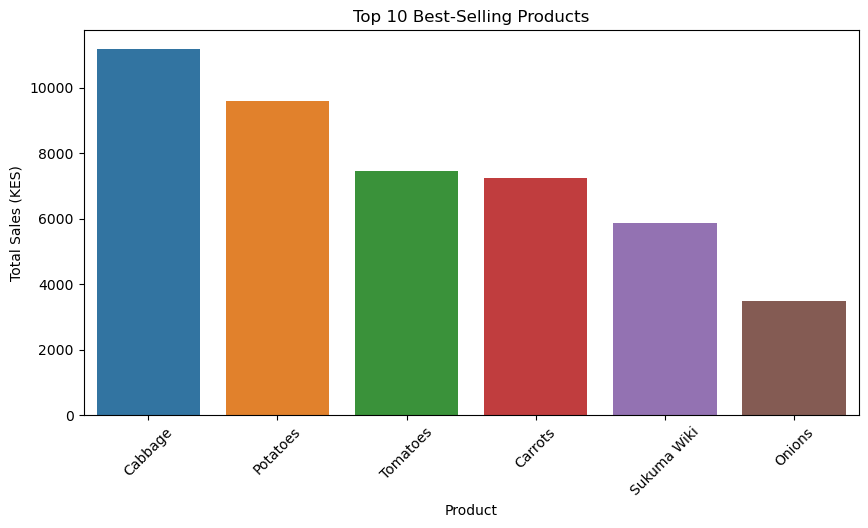

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top-selling products
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Best-Selling Products")
plt.ylabel("Total Sales (KES)")
plt.xticks(rotation=45)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


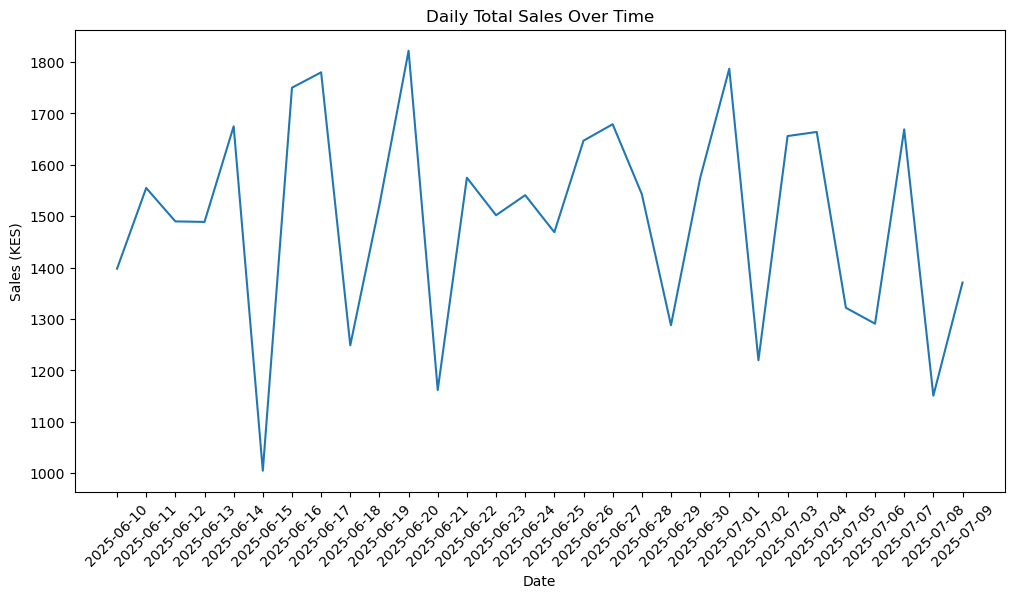

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_revenue, x='Date', y='Total Sales')
plt.title("Daily Total Sales Over Time")
plt.ylabel("Sales (KES)")
plt.xticks(rotation=45)
plt.show()


In [37]:

# Simulate Buying Price as 60% to 90% of the Selling Price
df['Buying Price (KES)'] = df['Unit Price (KES)'] * np.random.uniform(0.6, 0.9, size=len(df))
df['Buying Price (KES)'] = df['Buying Price (KES)'].round(2)  # Optional: round to 2 decimals


In [39]:
# Calculate Total Cost = Buying Price × Quantity Sold
df['Total Cost'] = df['Buying Price (KES)'] * df['Quantity Sold']

# Calculate Profit = Total Sales - Total Cost
df['Profit'] = df['Total Sales'] - df['Total Cost']


In [41]:
# Profit per Product
product_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)

# Profit per Day
daily_profit = df.groupby('Date')['Profit'].sum().reset_index()


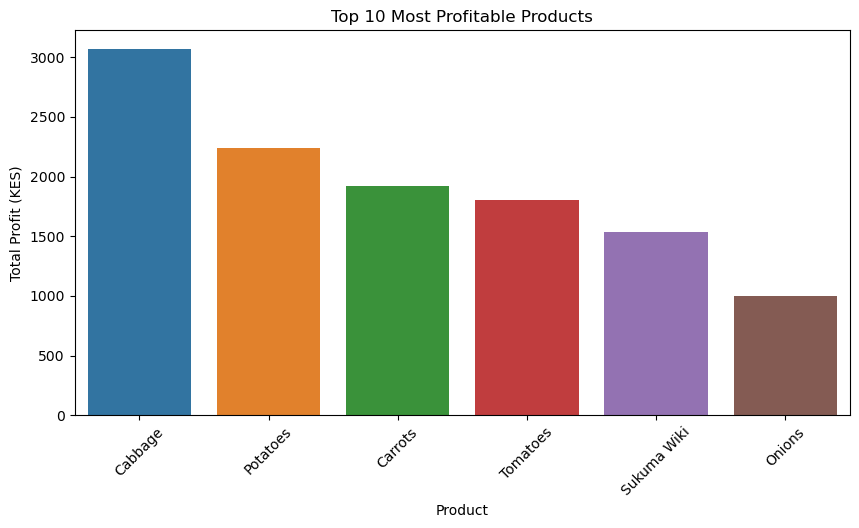

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


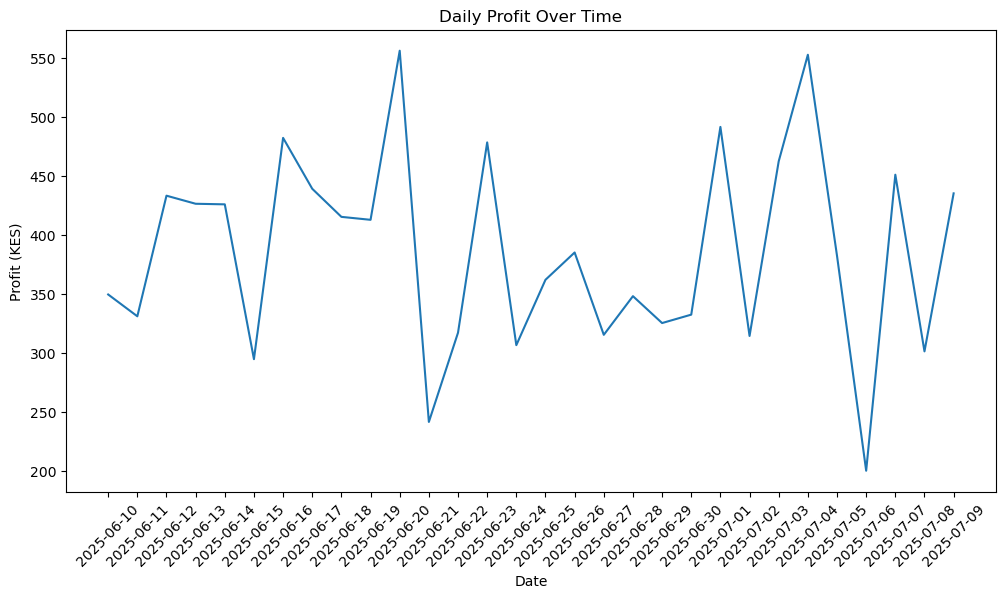

In [43]:

# Top Profitable Products
plt.figure(figsize=(10,5))
sns.barplot(x=product_profit.head(10).index, y=product_profit.head(10).values)
plt.title("Top 10 Most Profitable Products")
plt.ylabel("Total Profit (KES)")
plt.xticks(rotation=45)
plt.show()

# Daily Profit Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_profit, x='Date', y='Profit')
plt.title("Daily Profit Over Time")
plt.ylabel("Profit (KES)")
plt.xticks(rotation=45)
plt.show()


In [45]:
# Generate lag and rolling features
df['prev_day_sales'] = df.groupby('Product')['Quantity Sold'].shift(1)
df['rolling_mean_3'] = df.groupby('Product')['Quantity Sold'].shift(1).rolling(3).mean()
df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek

# Drop rows with missing values caused by shifting
df_model = df.dropna(subset=['prev_day_sales', 'rolling_mean_3'])


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target
features = ['prev_day_sales', 'rolling_mean_3', 'day_of_week', 'Unit Price (KES)', 'Stock Remaining']
target = 'Quantity Sold'

X = df_model[features]
y = df_model[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


MSE: 32.460751428571434
MAE: 4.720857142857142


In [51]:
import os

# Create folder if it doesn't exist
os.makedirs('models', exist_ok=True)

# Now save the model
import joblib
joblib.dump(model, 'models/mama_sales_predictor.pkl')


['models/mama_sales_predictor.pkl']

In [57]:
# Simulate latest row (you can automate this later)
latest_data = X_test.iloc[4:]

# Predict next day's sales
predicted_quantity = model.predict(latest_data)
print("Predicted Quantity Sold:", predicted_quantity[0])




Predicted Quantity Sold: 13.31


In [59]:
import joblib
import numpy as np

def load_model_and_predict(input_features, model_path='models/mama_sales_predictor.pkl'):
    """
    Loads the trained model and predicts quantity sold based on input features.

    Parameters:
    - input_features (list or array): A list or 1D numpy array of features in the correct order.
      [prev_day_sales, rolling_mean_3, day_of_week, unit_price, stock_remaining]
    - model_path (str): Path to the saved model file.

    Returns:
    - Predicted quantity sold (float)
    """
    try:
        # Load model
        model = joblib.load(model_path)
        
        # Ensure input is 2D for scikit-learn
        input_array = np.array(input_features).reshape(1, -1)
        
        # Predict
        prediction = model.predict(input_array)
        return round(prediction[0], 2)
    
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None


In [61]:
# Sample input: [prev_day_sales, rolling_mean_3, day_of_week, unit_price, stock_remaining]
sample_input = [15, 12.5, 2, 40, 30]  # e.g., Wednesday, price 40 KES, 30 items in stock

predicted_quantity = load_model_and_predict(sample_input)
print("Predicted Quantity Sold:", predicted_quantity)


Predicted Quantity Sold: 13.11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
